In [2]:
import h5py as h

In [3]:
ds = h.File('catalog.h5')
print(ds)

<HDF5 file "catalog.h5" (mode r)>


In [4]:
ds.keys()

<KeysViewHDF5 ['Halo00000000', 'Halo00000001', 'Halo00000002', 'Halo00000003', 'Halo00000004', 'Halo00000005', 'Halo00000006', 'Halo00000007', 'Halo00000008', 'Halo00000009', 'Halo00000010', 'Halo00000011', 'Halo00000012', 'Halo00000013', 'Halo00000014', 'Halo00000015', 'Halo00000016', 'Halo00000017', 'Halo00000018', 'Halo00000019', 'Halo00000020', 'Halo00000021', 'Halo00000022', 'Halo00000023', 'Halo00000024', 'Halo00000025', 'Halo00000026', 'Halo00000027', 'Halo00000028', 'Halo00000029', 'Halo00000030', 'Halo00000031', 'Halo00000032', 'Halo00000033', 'Halo00000034', 'Halo00000035', 'Halo00000036', 'Halo00000037', 'Halo00000038', 'Halo00000039', 'Halo00000040', 'Halo00000041', 'Halo00000042', 'Halo00000043', 'Halo00000044', 'Halo00000045', 'Halo00000046', 'Halo00000047', 'Halo00000048', 'Halo00000049', 'Halo00000050', 'Halo00000051', 'Halo00000052', 'Halo00000053', 'Halo00000054', 'Halo00000055', 'Halo00000056', 'Halo00000057', 'Halo00000058', 'Halo00000059', 'Halo00000060', 'Halo0000

In [5]:
for key in ds.keys():
    print(ds[key].keys())
    break

<KeysViewHDF5 ['M_HI', 'M_HII', 'Mstar', 'Mstar_pop2', 'Mstar_pop2_young', 'Mstar_pop3', 'Nesc', 'Ntot', 'NumberOfPop2Stars', 'NumberOfPop3Stars', 'SFR', 'center', 'fesc', 'fgas', 'fstar', 'mass', 'redshift', 'rvir']>


In [6]:
# append to hdf5 file
import yt

In [7]:
half_rad = []
for halo in ds.keys():
    center = list(ds[halo]['SFR'])

In [8]:
center

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.510385777184007e-05,
 5.036834833717145e-05,
 0.001991233705686818,
 0.004023154669108055,
 0.005117357639142305,
 0.0058649787944295905,
 0.006344632829132147,
 0.001784146027742063,
 0.0008458373783667337,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
all_groups = {}
fescs = []
groups = []
fgases = []
masses = []
SFRs = [] 
centers = []
Mstars = []
redshifts = []
for halo in ds.keys(): # loops through halos
    fesc_list = list(ds[halo]['fesc'])
    fgas_list = list(ds[halo]['fgas'])
    mass_list = list(ds[halo]['mass'])
    SFR_list = list(ds[halo]['SFR'])
    Mstar_list = list(ds[halo]['Mstar'])
    redshift_list = list(ds[halo]['redshift'])    
    for index, fesc in enumerate(fesc_list):# loops thru timestep
        if fesc <= 0.01:
            group = 0
        elif 0.01 < fesc <= 0.10:
            group = 1
        elif 0.10 < fesc <= 0.25:
            group = 2
        else:
            group = 3
        # used enumerate to find index and only use "good" values
        if fesc >= 1e-5:
            fescs.append(fesc)
            groups.append(group)
            fgases.append(ds[halo]['fgas'][index])
            masses.append(ds[halo]['mass'][index])
            SFRs.append(ds[halo]['SFR'][index])
            Mstars.append(ds[halo]['Mstar'][index])
            redshifts.append(ds[halo]['redshift'][index])
            centers.append(ds[halo]['center'][index])
    all_groups[halo] = groups

# Sanity check: All parameter arrays should be same size
print(len(fescs), len(fgases), len(masses), len(SFRs), len(Mstars), len(redshifts)) # length is 3122 for all

# Sanity check 2: Length of all_groups should be same as number of halos
print(len(ds.keys()) == len(all_groups)) # length is 296




3122 3122 3122 3122 3122 3122
True


In [11]:
print(np.unique(redshifts))

[11.59921885 11.7000254  11.80081925 11.8998968  12.00052002 12.09929264
 12.19957761 12.29964091 12.39943722 12.50074254 12.5998912  12.70050692
 12.80071764 12.90047262 12.99972001 13.10039481 13.20051122 13.3000143
 13.40092166 13.49905756 13.60067163 13.69939732 13.79946722 13.90090896
 13.99925004 14.10117789 14.1998784  14.2998776  14.40120129 14.49907006
 14.60062402 14.70105197 14.80028441 14.90077914 15.         15.10046691
 15.19957881 15.2999185  15.39881929 15.49892757 15.6002656  15.7000668
 15.80107527 15.90045631 16.00102006 16.1998624  16.40038281 16.59943682
 16.7999288  16.99856012 17.20167455 17.39926403 17.60119048 17.80052641
 18.00057002 18.20122888 18.3986421  18.6001568  18.79805979 19.
 19.2020202  19.3998368  19.60156572 19.79866889 19.99958001 20.50075253
 20.99736032 21.50225023 21.99908004 22.50176263 22.99808015 25.00104004]


In [174]:
# import numpy.ma as ma
        
# # 296 halos, 75 redshifts
# all_redshift_lengths = []
# for halo in ds.keys():
#     redshift_length = len(list(ds[halo]['redshift']))
#     all_redshift_lengths.append(redshift_length)
     

# all_centers = np.zeros((len(ds.keys()), max(all_redshift_lengths), 3))
# all_fesc = np.zeros((len(ds.keys()), max(all_redshift_lengths)))
# mask_centers = np.zeros((len(ds.keys()), max(all_redshift_lengths), 3), dtype = bool)
# mask_fesc = np.zeros((len(ds.keys()), max(all_redshift_lengths)), dtype = bool)

# for i, length in enumerate(all_redshift_lengths):
#     for j in range(length):
#         mask[i, j, :] = True, True, True
        
# for i, halo in enumerate(ds.keys()):
#     for j, center in enumerate(list(ds[halo]['center'])):
#         all_centers[i,j,:] = np.array(center)
#     for j, fesc in enumerate(list(ds[halo]['fesc'])): 
#         all_fesc[i,j] = fesc

# all_centers = ma.array(all_centers, mask = mask_centers)
# all_fesc =  ma.array(all_fesc, mask = mask_fesc)
        
# distance =  np.zeros((len(ds.keys()), max(all_redshift_lengths)))
# distance.fill(np.inf)
# for halo_no in range(len(ds.keys())):
#     for z in range(max(all_redshift_lengths)):
#         center = all_centers[halo_no,z]
#         distance[:,z] = np.linalg.norm(all_centers[:,z]-center, axis = 1)

    
# print(all_redshift_lengths)

[69, 56, 66, 43, 43, 68, 75, 28, 65, 71, 65, 65, 67, 75, 75, 58, 51, 40, 55, 68, 68, 71, 75, 75, 65, 66, 71, 49, 66, 70, 56, 34, 67, 66, 59, 73, 68, 73, 49, 15, 69, 54, 66, 63, 71, 56, 54, 71, 40, 71, 57, 73, 23, 49, 69, 71, 73, 70, 69, 58, 67, 70, 48, 71, 54, 45, 67, 58, 68, 49, 71, 74, 21, 57, 66, 68, 72, 65, 75, 66, 32, 66, 63, 69, 49, 68, 72, 59, 67, 73, 63, 67, 48, 52, 65, 65, 36, 66, 26, 63, 72, 75, 70, 68, 74, 39, 64, 57, 72, 58, 33, 68, 25, 66, 56, 56, 25, 44, 71, 51, 72, 67, 30, 65, 51, 48, 64, 50, 73, 19, 65, 57, 57, 56, 63, 64, 36, 37, 71, 73, 66, 75, 35, 75, 25, 49, 51, 65, 56, 74, 68, 62, 60, 67, 58, 69, 59, 66, 33, 70, 38, 49, 67, 65, 75, 28, 66, 59, 29, 51, 70, 61, 65, 56, 49, 67, 62, 69, 70, 38, 28, 61, 7, 71, 17, 36, 20, 67, 75, 65, 69, 50, 58, 58, 25, 47, 66, 59, 40, 65, 61, 60, 68, 64, 49, 65, 27, 63, 63, 67, 48, 64, 66, 56, 62, 26, 32, 66, 22, 69, 20, 23, 74, 65, 55, 65, 60, 29, 67, 65, 72, 65, 58, 47, 51, 67, 32, 56, 38, 41, 34, 71, 68, 62, 25, 32, 75, 69, 66, 70, 

In [185]:
# (np.array(all_redshift_lengths) <= 69).sum()

238

In [199]:
closest_halo_dist = [] # all halos concatenation of min_dist_at_z's

for i, halo1 in enumerate(ds.keys()):
    print(f"i = {i}")
    center_list = list(ds[halo1]['center'])
    n_redshifts_halo1 = len(list(ds[halo1]['redshift']))
    min_dist_at_z = [] # array of minimum distances at each redshift for halo N
    
    for z in range(n_redshifts_halo1):
        dist_to_halo1= [] # array of ALL distances at each redshift for halo N
        
        for j,halo2 in enumerate(ds.keys()):
            
            if i == j:
                continue
            
            center_list2 = list(ds[halo2]['center'])
            n_redshifts_halo2 = len(list(ds[halo2]['redshift']))
           
            
            if z >= n_redshifts_halo2:
                continue
                
            
            halo1_center = center_list[z]
            halo2_center = center_list2[z]
            
    
            dist_to_halo1.append(np.sqrt((halo1_center[0]-halo2_center[0])**2 + (halo1_center[1]-halo2_center[1])**2 + (halo1_center[2]-halo2_center[2])**2 ))
        

        if len(dist_to_halo1) == 0:
            continue
            
        min_dist_at_z.append(min(dist_to_halo1)) # PROBLEM WITH THIS
    
    closest_halo_dist.append(min_dist_at_z)


i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
i = 100
i = 101
i = 102
i = 103
i = 104
i = 105
i = 106
i = 107
i = 108
i = 109
i = 110
i = 111
i = 112
i = 113
i = 114
i = 115
i = 116
i = 117
i = 118
i = 119
i = 120
i = 121
i = 122
i = 123
i = 124
i = 125
i = 126
i = 127
i = 128
i = 129
i = 130
i = 131
i = 132
i = 133
i = 134
i = 135
i = 136
i = 137
i = 13

In [ ]:
print(closest_halo_dist)

In [201]:
arr = np.array(closest_halo_dist)
np.save('min_dist_normal', arr)

/tmp/ipykernel_1498/1373678359.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(closest_halo_dist)


In [172]:
print(len(closest_halo_dist[0]))

56


In [202]:
from yt.utilities.cosmology import Cosmology

co = Cosmology()

 
all_t_lookbacks = []
for halo in ds.keys():
    t_lookbacks_halo = []
    for z_idx in range(len(list(ds[halo]['redshift']))):
        t_lookback = co.t_from_z(0) - co.t_from_z(ds[halo]['redshift'][z_idx])
        t_lookbacks_halo.append(t_lookback)
    all_t_lookbacks.append(t_lookbacks_halo)

In [203]:
arr2 = np.array(all_t_lookbacks)
np.save('t_lookback_normal', arr2)

/tmp/ipykernel_1498/115754983.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr2 = np.array(all_t_lookbacks)


In [44]:
t_lookback = np.load('t_lookback_normal.npy', allow_pickle = True)
min_dist = np.load('min_dist_normal.npy', allow_pickle = True)

In [17]:
# print(f'NORM: {np.linalg.norm(all_centers[:,z]-center, axis = 1)}')
# print(f'ALL CENTERS {all_centers[:,z]}')
# print(f'CENTER:{center}')

In [18]:
# np.min(SFRs[SFRs != 0])
minsfr = 100
for each in SFRs:
    if each < minsfr and each != 0.:
        minsfr = each
print(each)

0.001784146027742063


In [19]:
masses

[3380224926.992715,
 3299024674.3191757,
 3215556588.5356255,
 3073838923.8206606,
 2913785711.4873447,
 2570655484.3533587,
 2505834729.167289,
 2179203186.494319,
 2211860439.447175,
 2065288017.7761762,
 1919810286.4714735,
 1926627326.835315,
 1865044999.2645564,
 1783539688.5521364,
 1735776109.215406,
 1637180689.951307,
 1544123131.7256577,
 1509318050.1285434,
 1459479703.8098915,
 1248771742.1926913,
 1355361377.037151,
 1283150317.9564598,
 1181455323.4343517,
 1073240290.0893987,
 976530180.0497017,
 913880651.8249165,
 870989705.1505412,
 844812887.7485251,
 824996976.5826399,
 803019299.6994716,
 777856081.5802172,
 750390965.2046118,
 726505066.4823706,
 694341775.3481793,
 652087701.6425964,
 601432744.4017963,
 520968863.5503441,
 503570456.4282901,
 466475690.4399628,
 446138054.0223443,
 418339093.33234394,
 391071675.34323955,
 342665675.71371824,
 325958161.47398007,
 314420966.1949795,
 290128810.875418,
 266585862.57688087,
 244384647.05748343,
 223666328.5336163,

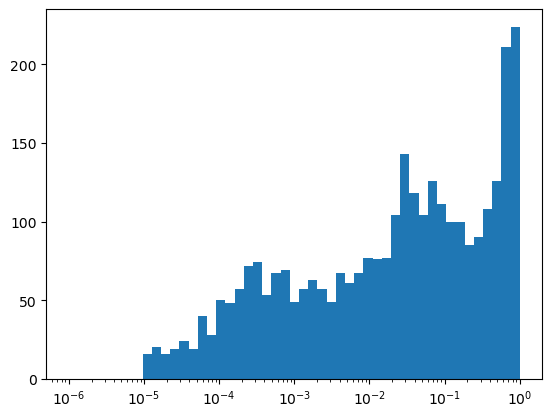

In [20]:
plt.hist(fescs, bins = np.logspace(-6, 0))
plt.xscale('log')

## Architecture

In [26]:
import torch 
import torch.nn as nn
import numpy as np
import sys, os, time
import optuna # Optimizer

In [25]:
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached alembic-1.11.1-py3-none-any.whl (224 kB)
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)


In [27]:
# 1 hidden layer code

# inp ---------> size of input data
# h1 ----------> size of first hidden layer
# out ---------> size of output data
# dr ----------> dropout rate
class model_1hl(nn.Module):
    
    def __init__(self, inp, h1, out, dr):
        super(model_1hl, self).__init__()

        self.fc1 = nn.Linear(inp, h1) # lin trans
        self.fc2 = nn.Linear(h1,  out)
        
        self.dropout   = nn.Dropout(p=dr) #normalizes by zeroing at random
        self.ReLU      = nn.ReLU() # RELU(x) = max(0,x)
        self.LeakyReLU = nn.LeakyReLU(0.2) # LeakyReLU = max(0,x) + neg_slope * min(0,x)
        
        # initialize the weights of the different layers
        for m in self.modules(): 
            if isinstance(m, nn.BatchNorm3d) or isinstance(m, nn.BatchNorm1d): # if module is Batch normalization: y = gamma*(x -  E(x))/sqrt(Var(x) + eps) + b
                nn.init.constant_(m.weight, 1) 
                nn.init.constant_(m.bias, 1)
            elif isinstance(m, nn.Conv3d) or isinstance(m, nn.ConvTranspose2d) or isinstance(m, nn.Linear):
                 '''if module is 3D Convolution: over an input signal composed of several input planes. or ConvTranspose2d Applies a 3D transposed convolution operator over an input image composed of several input planes. The transposed convolution operator multiplies each input value element-wise by a learnable kernel, and sums over the outputs from all input feature planes. Or Lin Trans'''
                 nn.init.kaiming_normal_(m.weight) # normalization that makes extremely deep models (>30 layers) to converge
       
    # forward pass
    def forward(self, x):
        out = self.dropout(self.LeakyReLU(self.fc1(x))) # Apply leakyRELU on input and dropout normalize
        out = self.fc2(out) 
        # out = nn.Softmax(out)
        return out


In [28]:
# N hidden layer code, similar structure to above but generalized
def dynamic_model2(input_size, output_size, n_layers, hidden, dr):

    # define the tuple containing the different layers
    layers = []

    # get the hidden layers
    in_features = input_size
    for i in range(n_layers):
        out_features = hidden[i]
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU(0.2))
        layers.append(nn.Dropout(dr[i]))
        in_features = out_features

    # get the last layer
    layers.append(nn.Linear(out_features, output_size))

    # return the model
    return nn.Sequential(*layers)

#model = dynamic_model2(numFeatures, outSize, numHL, [h1, h2], [dr1, dr1])

## Data

In [29]:
from random import shuffle
import torch 
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import sys, os, time, h5py
from pathlib import Path

In [30]:
def normalize_data(data, labels):
    ######################
    # normalize input
    ## the id's correspond to the id's of the feature array you made using vstack in read_data()
    data[:,0]  = (data[:,0] - np.mean(data[:,0]))/np.std(data[:,0]) # Z Scores
    data[:,1]  = (data[:,1] - np.mean(data[:,1]))/np.std(data[:,1])
    data[:,2]  = (data[:,2] - np.mean(data[:,2]))/np.std(data[:,2])
    data[:,3]  = (data[:,3] - np.mean(data[:,3]))/np.std(data[:,3])
    data[:,4]  = (data[:,4] - np.mean(data[:,4]))/np.std(data[:,4])

    ######################
    # normalize labels
    print ("labels", labels)

    # # array = np.log10(labels) # Since labels are large log them
    # print("labels array", array)
    # labels = array
    
    return data, labels

In [58]:
# read data and get training, validation or testing sets
# fin ---------> file with the data
# seed --------> random seed used to split among different datasets
# mode --------> 'train', 'valid', 'test' or 'all'
# normalize ---> whether to normalize the data or not
def read_data(fin, seed, mode, normalize): #fin for h5
    File = 'catalog.h5'
    f     = h5py.File(fin, 'r')
    masses = []
    fgases = []
    SFRs = []
    Mstars = []
    redshifts = []
    fescs = []
    groups = []
    min_dist = []
    t_lookback = []
    
    
    t_lookback_normal = np.array(np.load('t_lookback_normal.npy', allow_pickle = True))
    t_lookback_all = []
    for list_i in t_lookback_normal:
        for elem in list_i:
            t_lookback_all.append(elem)
        
    min_dist_normal = np.array(np.load('min_dist_normal.npy', allow_pickle = True))
    min_dist_all = []
    for listi in min_dist_normal:
        for elem in listi:
            min_dist_all.append(elem)
    
    for halo in f.keys():
        fesc_list = list(f[halo]['fesc']) 
        for index, fesc in enumerate(fesc_list):
            if fesc <= 0.01:
                group = 0
            elif 0.01 < fesc <= 0.10:
                group = 1
            elif 0.10 < fesc <= 0.25:
                group = 2
            else:
                group = 3
                
            if fesc >= 1e-5:
                masses.append(f[halo]['mass'][index])
                fgases.append(f[halo]['fgas'][index])
                SFRs.append(f[halo]['SFR'][index])
                Mstars.append(f[halo]['Mstar'][index])
                redshifts.append(f[halo]['redshift'][index])
                fescs.append(fesc)
                groups.append(group)
                t_lookback.append(t_lookback_all[index])
                min_dist.append(min_dist_all[index])
                
    # min_SFR = np.min(SFRs[SFRs != 0])
    minsfr = 100
    for each in SFRs:
        if each < minsfr and each != 0.:
            minsfr = each
    new_SFRs = []
    for SFR in SFRs:
        if SFR == 0.0:
            new_SFRs.append(minsfr*0.9)
        else:
            new_SFRs.append(SFR)        
    # normalize data - EDIT
    ## anything not on order 10^0 - 10^1 should be logged
    masses = np.log10(masses)
    SFRs = np.log10(new_SFRs)
    Mstars = np.log10(Mstars)
    fgases = np.log10(fgases)
    min_dist = np.log10(min_dist)
    t_lookback = np.log10(t_lookback)
    
    # get data, labels and number of elements
    data = np.vstack([SFRs, Mstars, masses, redshifts, fgases, min_dist, t_lookback]).T # THESE ARE YOUR CHOSEN INPUT VARIABLES
    
    labels = np.array(groups, dtype = 'int')
    print("labels.shape", labels.shape)
    # labels = fluxes.reshape((fluxes.shape[0], fluxSize))
    elements = data.shape[0]
    
    # normalize data
    if normalize:  data, labels = normalize_data(data, labels)

    # get the size and offset depending on the type of dataset
    if   mode=='train':   size, offset = int(elements*0.70), int(elements*0.00)
    elif mode=='valid':   size, offset = int(elements*0.15), int(elements*0.70)
    elif mode=='test':    size, offset = int(elements*0.15), int(elements*0.85)
    elif mode=='all':     size, offset = int(elements*1.00), int(elements*0.00)
    else:                 raise Exception('Wrong name!')

    # randomly shuffle the cubes. Instead of 0 1 2 3...999 have a 
    # random permutation. E.g. 5 9 0 29...342
    np.random.seed(seed)
    indexes = np.arange(elements) 
    np.random.shuffle(indexes)
    indexes = indexes[offset:offset+size] #select indexes of mode

    return data[indexes], labels[indexes]



In [46]:
class make_dataset():

    def __init__(self, mode, seed, fin):

        # get data
        inp, out = read_data(fin, seed, mode, normalize=True)

        # get the corresponding bottlenecks and parameters
        self.size   = inp.shape[0]
        self.input  = torch.tensor(inp, dtype=torch.float32)
        self.output = torch.tensor(out, dtype= torch.long)
        
        print ("size of input and output", np.shape(self.input), np.shape(self.output))
        
    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        return self.input[idx], self.output[idx]

In [38]:
def create_dataset(mode, seed, fin, batch_size, shuffle):
    data_set = make_dataset(mode, seed, fin)
    dataset_loader = DataLoader(dataset=data_set, batch_size=batch_size, shuffle=shuffle)
    return dataset_loader

## Main

In [73]:
fin = 'catalog.h5'
dataname = 'Normal'      # Nickname for data
seed = 20                # remember this to reproduce split
numFeatures = 7        # number of input properties
outSize = 4          # size of wavelength array
featurelist = 'SFRs, Mstars, masses, redshifts, fgases, min_dist, t_lookback'

numHL = 5           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_1 = 265            # nodes in second hidden layer
h2_1 = 306
h3_1 = 286
h4_1 = 309
h5_1 = 499
dr1_1 = 0.48303759321338957
dr2_1 = 0.32620849779889893
dr3_1 = 0.3163743611025014
dr4_1 = 0.7661053540089837
dr5_1 = 0.3339235798444601
lr_1 = 0.0013378392548823155
wd_1 = 1.033893175510939e-05

Trial 46 finished with value: 0.8143988083570431 and parameters: {'dropout_l0': 0.48303759321338957, 'dropout_l1': 0.32620849779889893, 'dropout_l2': 0.3163743611025014, 'dropout_l3': 0.7661053540089837, 'dropout_l4': 0.3339235798444601, 'lr': 0.0013378392548823155, 'n_layers': 5, 'n_units_l0': 265, 'n_units_l1': 306, 'n_units_l2': 286, 'n_units_l3': 309, 'n_units_l4': 499, 'wd': 1.033893175510939e-05}. Best is trial 46 with value: 0.8143988083570431.

In [40]:
numHL = 4           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_2 = 319            # nodes in second hidden layer
h2_2 = 309
h3_2 = 487
h4_2 = 245
dr1_2 = 0.48326007288595463
dr2_2 = 0.22691770014786583
dr3_2 = 0.4133618765743943
dr4_2 = 0.20222387654738752
lr_2 = 0.0024461318194048767
wd_2 = 0.00038150231346785777

Trial 38 finished with value: 0.8062396895172249 and parameters: {'n_layers': 4, 'n_units_l0': 319, 'dropout_l0': 0.48326007288595463, 'n_units_l1': 309, 'dropout_l1': 0.22691770014786583, 'n_units_l2': 487, 'dropout_l2': 0.4133618765743943, 'n_units_l3': 245, 'dropout_l3': 0.20222387654738752, 'lr': 0.0024461318194048767, 'wd': 0.00038150231346785777}. Best is trial 38 with value: 0.8062396895172249.

In [41]:
numHL = 4           # number of hidden layers
# h1 = 954                # nodes in first hidden layer
h1_3 = 360            # nodes in second hidden layer
h2_3 = 318
h3_3 = 186
h4_3 = 230
dr1_3 = 0.5991490308822351
dr2_3 = 0.6557328854093288
dr3_3 = 0.2229397980059654
dr4_3 = 0.37167582651003706
lr_3 = 0.0005674724247255081
wd_3 = 4.344007387477737e-05

Trial 19 finished with value: 0.810626839980101 and parameters: {'n_layers': 4, 'n_units_l0': 360, 'dropout_l0': 0.5991490308822351, 'n_units_l1': 318, 'dropout_l1': 0.6557328854093288, 'n_units_l2': 186, 'dropout_l2': 0.2229397980059654, 'n_units_l3': 230, 'dropout_l3': 0.37167582651003706, 'lr': 0.0005674724247255081, 'wd': 4.344007387477737e-05}. Best is trial 19 with value: 0.810626839980101.

In [42]:
h1_non = 150
h2_non = 150
numHL_non = 2
# # # dr1 = 0.20103              # dropout rate for layer 1
dr1_non = 0.35
# # # training parameters
batch_size = 256  
# # # lr         = 1.404e-3     (learning rate)
lr_non = 0.01
epochs     = 1000
# # # wd         = 1.195e-6
wd_non = 0

Trial 49 finished with value: 0.7992990006748427 and parameters: {'n_layers': 4, 'n_units_l0': 326, 'dropout_l0': 0.6140597590944773, 'n_units_l1': 203, 'dropout_l1': 0.28132639142015986, 'n_units_l2': 460, 'dropout_l2': 0.25855030410354674, 'n_units_l3': 337, 'dropout_l3': 0.24732580986058228, 'lr': 0.0033140422147764532, 'wd': 0.0020272408464552176}. Best is trial 49 with value: 0.7992990006748427.

In [59]:
# name of output files


name   = "Normal_dynamicmodel2"
device = torch.device('cpu')
# define loss function
criterion = nn.CrossEntropyLoss()  # MSE or Cross Entropy

# get train, validation, and test sets
print('preparing dataset...')
train_loader = create_dataset('train', seed, fin, batch_size, True)
valid_loader = create_dataset('valid', seed, fin, batch_size, False)
test_loader  = create_dataset('test',  seed, fin, batch_size, False)



preparing dataset...
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


In [57]:
print(np.shape(min_dist))
print(np.shape(SFRs))

(296,)
(3122,)


In [ ]:
np.array(masses).shape

In [74]:
# define architecture
# model = architecture.model_1hl(numFeatures, h1, fluxSize, dr1) # change function according to number of hidden layers
model = dynamic_model2(numFeatures, outSize, numHL, [h1_1, h2_1, h3_1, h4_1, h5_1], [dr1_1, dr2_1, dr3_1, dr4_1, dr5_1])
#model_non = dynamic_model2(numFeatures, outSize, numHL_non, [h1_non, h2_non], [dr1_non, dr1_non])

In [75]:
fout   = 'test_new_var_opt.txt'
fmodel = 'test_new_var_opt.pt'
#casts parameters/buffers to specified gpu
model.to(device=device)
#get num elements in each network parameters and sum them
network_total_params = sum(p.numel() for p in model.parameters())
print('total number of parameters in the model = %d'%network_total_params)

# define optimizer and scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=lr_1, betas=(0.5, 0.999), 
                             weight_decay=wd_1)	


# load best-model, if it exists
'''
if os.path.exists(fmodel):  
    print('Loading model...')
    model.load_state_dict(torch.load(fmodel))
# get validation loss
print('Computing initial validation loss')
model.eval()
min_valid_loss, points = 0.0, 0
for x, y in valid_loader:
    with torch.no_grad():
        x    = x.to(device=device)
        y    = y.to(device=device)
        y_NN = model(x)
        min_valid_loss += (criterion(y_NN, y).item())*x.shape[0]
        points += x.shape[0]
min_valid_loss /= points
print('Initial valid loss = %.3e'%min_valid_loss)
'''
# see if results for this model are available (if you're continuing training on a model)
'''
if os.path.exists(fout):  
    dumb = np.loadtxt(fout, skiprows = 11, unpack=False)
    if dumb.size == 0:
        offset = 0
    else: offset = int(dumb[:,0][-1]+1)
else:   offset = 0
'''

# do a loop over all epochs
start = time.time()
min_valid_loss = 1000
for epoch in range(epochs):
    # do training
    train_loss, points = 0.0, 0
    model.train()
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)
        y_NN = model(x)
        #y = nn.Softmax(y)
        #y_NN = nn.Softmax(y_NN)
        loss = criterion(y_NN, y)
        train_loss += (loss.item())*x.shape[0]
        points     += x.shape[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= points

    # do testing
    test_loss, points = 0.0, 0
    model.eval()
    for x, y in test_loader:
        with torch.no_grad():
            x    = x.to(device)
            y    = y.to(device)
            #y = nn.Softmax(y)
            y_NN = model(x)
            #y_NN = nn.Softmax(y_NN)
            test_loss += (criterion(y_NN, y).item())*x.shape[0]
            points    += x.shape[0]
    test_loss /= points
    
    # save model if it is better
    if test_loss<min_valid_loss:
        torch.save(model.state_dict(), fmodel)
        min_valid_loss = test_loss
        print('%03d %.3e %.3e (saving)'%(epoch, train_loss, test_loss))
    else:
        print('%03d %.3e %.3e'%(epoch, train_loss, test_loss))
    
    # save losses to file
    f = open(fout, 'a')
    f.write('%d %.5e %.5e\n'%(epoch, train_loss, test_loss))
    f.close()
    
stop = time.time()
print('Time take (m):', "{:.4f}".format((stop-start)/60.0))

total number of parameters in the model = 416691
000 1.330e+00 1.302e+00 (saving)
001 1.253e+00 1.199e+00 (saving)
002 1.159e+00 1.120e+00 (saving)
003 1.134e+00 1.082e+00 (saving)
004 1.162e+00 1.070e+00 (saving)
005 1.096e+00 1.066e+00 (saving)
006 1.076e+00 1.154e+00
007 1.089e+00 1.059e+00 (saving)
008 1.065e+00 1.052e+00 (saving)
009 1.064e+00 1.053e+00
010 1.055e+00 1.029e+00 (saving)
011 1.045e+00 1.030e+00
012 1.055e+00 1.025e+00 (saving)
013 1.041e+00 1.132e+00
014 1.042e+00 1.036e+00
015 1.017e+00 1.038e+00
016 1.020e+00 1.016e+00 (saving)
017 1.010e+00 1.028e+00
018 1.020e+00 1.075e+00
019 1.011e+00 9.848e-01 (saving)
020 1.019e+00 1.002e+00
021 1.007e+00 1.060e+00
022 1.002e+00 1.031e+00
023 1.000e+00 9.865e-01
024 1.005e+00 9.948e-01
025 9.891e-01 9.936e-01
026 1.007e+00 1.007e+00
027 9.876e-01 9.767e-01 (saving)
028 9.897e-01 9.931e-01
029 9.957e-01 9.980e-01
030 9.854e-01 1.003e+00
031 9.814e-01 9.767e-01 (saving)
032 9.908e-01 9.804e-01
033 9.888e-01 9.960e-01
034 9.700

In [85]:
'''
# do validation
valid_loss, points = 0.0, 0
model.eval()
for x, y in valid_loader:
    with torch.no_grad():
        x    = x.to(device)
        y    = y.to(device)
        #y = nn.Softmax(y)
        y_NN = model(x)
        #y_NN = nn.Softmax(y_NN)
        valid_loss += (criterion(y_NN, y).item())*x.shape[0]
        points     += x.shape[0]
valid_loss /= points
'''

'\n# do validation\nvalid_loss, points = 0.0, 0\nmodel.eval()\nfor x, y in valid_loader:\n    with torch.no_grad():\n        x    = x.to(device)\n        y    = y.to(device)\n        #y = nn.Softmax(y)\n        y_NN = model(x)\n        #y_NN = nn.Softmax(y_NN)\n        valid_loss += (criterion(y_NN, y).item())*x.shape[0]\n        points     += x.shape[0]\nvalid_loss /= points\n'

In [1]:
import numpy as np
losses = np.loadtxt('test_new_var_opt.txt')
train_losses = losses[:,1]
test_losses = losses[:,2]

# losses_1 = np.loadtxt('test_optuna1.txt', delimiter = ' ')
# train_losses_1 = losses_1[:,1]
# test_losses_1 = losses_1[:, 2]

# losses_2 = np.loadtxt('test_optuna2.txt', delimiter = ' ')
# train_losses_2 = losses_2[:,1]
# test_losses_2 = losses_2[:, 2]

# losses_3 = np.loadtxt('test_optuna3.txt', delimiter = ' ')
# train_losses_3 = losses_3[:,1]
# test_losses_3 = losses_3[:, 2]

#losses_non = np.loadtxt('test_non.txt', delimiter = ' ')
#train_losses_non = losses_non[:,1]
#test_losses_non = losses_non[:, 2]

In [90]:
! pwd 

/home/bsherwin51/Renaissance/Normal


Text(0, 0.5, 'Loss')

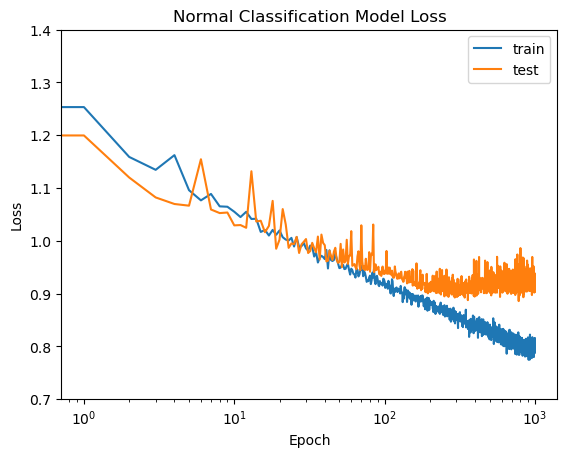

In [4]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label = 'train')
plt.plot(test_losses, label = 'test')
# plt.plot(train_losses_1, label = 'train Optuna 1')
# plt.plot(test_losses_1, label = 'test Optuna 1')
# plt.plot(train_losses_2, label = 'train Optuna 2')
# plt.plot(test_losses_2, label = 'test Optuna 2')
# plt.plot(train_losses_3, label = 'train Optuna 3')
# plt.plot(test_losses_3, label = 'test Optuna 3')
#plt.plot(train_losses_non, label = 'train no Optuna')
# plt.plot(test_losses_non, label = 'test no Optuna')
plt.xscale('log')
plt.ylim(0,1.5)
plt.ylim(0.7,1.4)
plt.legend()
plt.title("Normal Classification Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Optuna

In [68]:
def dynamic_model(trial, input_size, output_size, max_layers=3, max_neurons_layers=500):
    # define the tuple containing the different layers
    layers = []
    # get the number of hidden layers
    n_layers = trial.suggest_int("n_layers", 1, max_layers)
    # get the hidden layers
    in_features = input_size
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, max_neurons_layers)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU(0.2))
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.8)
        layers.append(nn.Dropout(p))
        in_features = out_features
    # get the last layer
    layers.append(nn.Linear(out_features, output_size))
    # return the model
    return nn.Sequential(*layers)


In [69]:
import numpy as np
import sys, os, time
import torch
import torch.nn as nn
import optuna
import h5py

In [70]:
class Objective(object):
    def __init__(self, input_size, output_size, max_layers, max_neurons_layers, device,
                 epochs, seed, batch_size):

        self.input_size         = input_size
        self.output_size        = output_size
        self.max_layers         = max_layers
        self.max_neurons_layers = max_neurons_layers
        self.device             = device
        self.epochs             = epochs
        self.seed               = seed
        self.batch_size         = batch_size

    def __call__(self, trial):

        # name of the files that will contain the losses and model weights
        f1 = 'losses_%s'%prefix
        f2 = 'models_%s'%prefix
        if not(os.path.exists(f1)):  os.system('mkdir %s'%f1)
        if not(os.path.exists(f2)):  os.system('mkdir %s'%f2)

        fout   = 'losses_%s/loss_%d.txt'%(prefix, trial.number)
        fmodel = 'models_%s/model_%d.pt'%(prefix, trial.number)
        
        dataname = 'fesc_test' # name of your dataset, for the loss file header
        
        # write properties & headers in case you need to refer in the future and you've changed the main.py file
        f = open(fout, 'w')
        f.write('training dataset: {}\n'.format(dataname))
        f.write('seed = {}\numFeatures = {}\nFeature List: {}\nfluxSize = {}\nbatch_size = {}\nepochs     = {}\n'.format(seed, input_size, features, output_size, batch_size, epochs))
        f.write('0 epoch  1 train loss  2 test loss\n')
        f.close()

        # generate the architecture
        model = dynamic_model(trial, self.input_size, self.output_size, 
                            self.max_layers, self.max_neurons_layers).to(self.device)

        # get the weight decay and learning rate values
        ## adjust boundary values as needed
        lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
        wd = trial.suggest_float("wd", 1e-8, 1e-2,  log=True)

        # define the optimizer
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, betas=(0.5, 0.999), 
                                      weight_decay=wd)

        # define loss function
        criterion = nn.CrossEntropyLoss() 

        # get the data
        train_loader = create_dataset('train', self.seed, fin, self.batch_size, True)
        valid_loader = create_dataset('valid', self.seed, fin, self.batch_size, False)
        test_loader  = create_dataset('test',  self.seed, fin, self.batch_size, False)

        # train/validate model
        min_valid = 1e40
        for epoch in range(self.epochs):

            # training
            train_loss, points = 0.0, 0
            model.train()
            for x, y in train_loader:
                x, y = x.to(self.device), y.to(self.device)
                y_NN = model(x)
                
                loss = criterion(y_NN, y)
                train_loss += (loss.item())*x.shape[0]
                points     += x.shape[0]
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            train_loss /= points
            '''
            # validation
            valid_loss, points = 0.0, 0
            model.eval()
            with torch.no_grad():
                for x, y in valid_loader:
                    x, y = x.to(self.device), y.to(self.device)
                    y_NN = model(x)
                    valid_loss += (criterion(y_NN, y).item())*x.shape[0]
                    points     += x.shape[0]
            valid_loss /= points
            '''
            # do testing
            test_loss, points = 0.0, 0
            model.eval()
            for x, y in test_loader:
                with torch.no_grad():
                    x    = x.to(device)
                    y    = y.to(device)
                    y_NN = model(x)
                    test_loss += (criterion(y_NN, y).item())*x.shape[0]
                    points    += x.shape[0]
            test_loss /= points
            
            #save this model if it's better
            if test_loss<min_valid:  
                min_valid = test_loss
                torch.save(model.state_dict(), fmodel)
            f = open(fout, 'a')
            f.write('%d %.5e %.5e\n'%(epoch, train_loss, test_loss))
            f.close()

            # Handle pruning based on the intermediate value
            # comment out these lines if using pruning
            #trial.report(min_valid, epoch)
            #if trial.should_prune():  raise optuna.exceptions.TrialPruned()

        return min_valid


In [71]:
##################################### INPUT ##########################################
# data parameters
fin      = 'catalog.h5' # file containing your global properties
features = 'SFRs, Mstars, masses, redshifts, fgases, min_dist, t_lookback' # writing the order of input data as per data.py. Modify as needed
f_features_norm = None
f_labels  = 'fesc_test_new_var.txt' # file containing output SEDs
seed      = 5

# optuna architecture parameters
input_size         = 7 # number of input global properties
output_size        = 4 # size of SED/wavelength array
max_layers         = 5 # max number of hidden layers to test out
max_neurons_layers = 500 # max number of nodes per hidden layer to test out

# training parameters
batch_size = 256
epochs     = 1000

# optuna parameters -- modify as needed
prefix    = 'inp{}out{}maxl{}maxn{}bs{}ep{}'.format(input_size, output_size, max_layers, max_neurons_layers, batch_size, epochs)
study_name       = 'fesc_new_var' 
n_trials         = 50 # set to None for infinite
storage          = 'sqlite:///fesc_%s.db'%prefix 
n_jobs           = 1
n_startup_trials = 30 # random sample the hyperparameter space before running the model sampler
#########################


In [72]:
device = torch.device('cpu')

# define the optuna study and optimize it
objective = Objective(input_size, output_size, max_layers, max_neurons_layers, 
                      device, epochs, seed, batch_size)
sampler = optuna.samplers.TPESampler(n_startup_trials=n_startup_trials)
study = optuna.create_study(study_name=study_name, sampler=sampler, storage=storage,
                            load_if_exists=True)
study.optimize(objective, n_trials, n_jobs=n_jobs)


[I 2023-06-20 11:08:30,022] A new study created in RDB with name: fesc_new_var


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:11:09,979] Trial 0 finished with value: 0.8488921589321561 and parameters: {'dropout_l0': 0.41098238393046577, 'dropout_l1': 0.7523606085988068, 'dropout_l2': 0.70925179733963, 'dropout_l3': 0.42101015173613254, 'lr': 0.0002813924856455179, 'n_layers': 4, 'n_units_l0': 307, 'n_units_l1': 336, 'n_units_l2': 431, 'n_units_l3': 359, 'wd': 2.244885870738801e-08}. Best is trial 0 with value: 0.8488921589321561.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:12:14,583] Trial 1 finished with value: 0.9296455434244922 and parameters: {'dropout_l0': 0.617632469627234, 'dropout_l1': 0.2267523293300885, 'lr': 5.7742693778631086e-05, 'n_layers': 2, 'n_units_l0': 81, 'n_units_l1': 54, 'wd': 0.0005834279965805242}. Best is trial 0 with value: 0.8488921589321561.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:13:33,815] Trial 2 finished with value: 0.8606635255691333 and parameters: {'dropout_l0': 0.4982045483608469, 'dropout_l1': 0.6204431309509015, 'lr': 0.00641293660358334, 'n_layers': 2, 'n_units_l0': 254, 'n_units_l1': 174, 'wd': 6.567652820124099e-07}. Best is trial 0 with value: 0.8488921589321561.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:14:58,471] Trial 3 finished with value: 0.8464392922882341 and parameters: {'dropout_l0': 0.5041965031728791, 'dropout_l1': 0.38671653165156267, 'dropout_l2': 0.34698216880268534, 'dropout_l3': 0.2756885912001197, 'lr': 0.006154313065575507, 'n_layers': 4, 'n_units_l0': 120, 'n_units_l1': 86, 'n_units_l2': 85, 'n_units_l3': 203, 'wd': 3.6609042448323692e-06}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:17:29,401] Trial 4 finished with value: 0.854969797990261 and parameters: {'dropout_l0': 0.29366108903273963, 'dropout_l1': 0.4332826175019432, 'dropout_l2': 0.647220097028513, 'dropout_l3': 0.44865565046381495, 'dropout_l4': 0.7664533765482178, 'lr': 0.0001829096475517923, 'n_layers': 5, 'n_units_l0': 121, 'n_units_l1': 293, 'n_units_l2': 379, 'n_units_l3': 267, 'n_units_l4': 147, 'wd': 0.00024208097539936955}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:19:35,662] Trial 5 finished with value: 0.8764463535740844 and parameters: {'dropout_l0': 0.4654421091192254, 'dropout_l1': 0.304698396197412, 'dropout_l2': 0.4823607618609073, 'dropout_l3': 0.6091984281065965, 'dropout_l4': 0.2129508283631626, 'lr': 0.005609968025545102, 'n_layers': 5, 'n_units_l0': 117, 'n_units_l1': 165, 'n_units_l2': 61, 'n_units_l3': 315, 'n_units_l4': 340, 'wd': 0.0018519322494184077}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:20:42,753] Trial 6 finished with value: 0.860503249698215 and parameters: {'dropout_l0': 0.47896509529504566, 'lr': 0.0014717854147976981, 'n_layers': 1, 'n_units_l0': 393, 'wd': 0.007989818524075444}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:21:53,363] Trial 7 finished with value: 0.8604627531817836 and parameters: {'dropout_l0': 0.3038512799370975, 'dropout_l1': 0.7834599787160712, 'lr': 0.006616716724935431, 'n_layers': 2, 'n_units_l0': 48, 'n_units_l1': 375, 'wd': 0.0022768193700500846}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:23:20,129] Trial 8 finished with value: 0.8492434330475636 and parameters: {'dropout_l0': 0.7268935952752484, 'dropout_l1': 0.24015038111442122, 'lr': 0.0003546967314596553, 'n_layers': 2, 'n_units_l0': 425, 'n_units_l1': 197, 'wd': 1.448104920433874e-08}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:24:28,478] Trial 9 finished with value: 0.870670896819514 and parameters: {'dropout_l0': 0.6307327577404103, 'dropout_l1': 0.43272267787125734, 'lr': 0.008189204828033621, 'n_layers': 2, 'n_units_l0': 35, 'n_units_l1': 363, 'wd': 2.215516184637607e-05}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:26:24,983] Trial 10 finished with value: 0.8835695762919564 and parameters: {'dropout_l0': 0.6996850719506256, 'dropout_l1': 0.43915144128171213, 'dropout_l2': 0.7644528981846048, 'dropout_l3': 0.5712082961211451, 'dropout_l4': 0.21088754787284095, 'lr': 0.0031904785274712937, 'n_layers': 5, 'n_units_l0': 317, 'n_units_l1': 54, 'n_units_l2': 234, 'n_units_l3': 208, 'n_units_l4': 349, 'wd': 1.6792115895251684e-06}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:28:10,602] Trial 11 finished with value: 0.9520516604439825 and parameters: {'dropout_l0': 0.36772765532740653, 'dropout_l1': 0.22181706658711775, 'dropout_l2': 0.7711633439888184, 'lr': 1.178253512787764e-05, 'n_layers': 3, 'n_units_l0': 463, 'n_units_l1': 242, 'n_units_l2': 38, 'wd': 0.00039829300734479066}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:29:12,856] Trial 12 finished with value: 0.8486611736126435 and parameters: {'dropout_l0': 0.21283012857279382, 'lr': 0.0017902276909456318, 'n_layers': 1, 'n_units_l0': 245, 'wd': 3.0092743772811745e-06}. Best is trial 3 with value: 0.8464392922882341.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:30:53,820] Trial 13 finished with value: 0.8397565647068187 and parameters: {'dropout_l0': 0.5881785123206221, 'dropout_l1': 0.7323844134623494, 'lr': 0.0010960356855057962, 'n_layers': 2, 'n_units_l0': 385, 'n_units_l1': 324, 'wd': 6.684685303081031e-05}. Best is trial 13 with value: 0.8397565647068187.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:32:27,456] Trial 14 finished with value: 0.9294811869278933 and parameters: {'dropout_l0': 0.3195056937997392, 'dropout_l1': 0.24041628786389985, 'dropout_l2': 0.2666832846399043, 'dropout_l3': 0.3665142526667983, 'dropout_l4': 0.4372707183719594, 'lr': 2.3118484542007762e-05, 'n_layers': 5, 'n_units_l0': 93, 'n_units_l1': 253, 'n_units_l2': 168, 'n_units_l3': 15, 'n_units_l4': 171, 'wd': 0.00016225622564974067}. Best is trial 13 with value: 0.8397565647068187.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:34:04,759] Trial 15 finished with value: 0.838355183091938 and parameters: {'dropout_l0': 0.3969894444456965, 'dropout_l1': 0.6781294985001394, 'lr': 0.003333803948604297, 'n_layers': 2, 'n_units_l0': 309, 'n_units_l1': 396, 'wd': 5.3821600242572735e-08}. Best is trial 15 with value: 0.838355183091938.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:36:29,663] Trial 16 finished with value: 0.910355464515523 and parameters: {'dropout_l0': 0.2061359778081993, 'dropout_l1': 0.3251636211736749, 'dropout_l2': 0.49869859021811574, 'dropout_l3': 0.5410157234913415, 'dropout_l4': 0.7109254153791933, 'lr': 3.054860594431332e-05, 'n_layers': 5, 'n_units_l0': 144, 'n_units_l1': 488, 'n_units_l2': 366, 'n_units_l3': 31, 'n_units_l4': 189, 'wd': 6.28179348441096e-05}. Best is trial 15 with value: 0.838355183091938.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:39:51,780] Trial 17 finished with value: 0.8247813062790113 and parameters: {'dropout_l0': 0.4208666206987251, 'dropout_l1': 0.3993485639572907, 'dropout_l2': 0.41224870897515875, 'dropout_l3': 0.6668249730198335, 'dropout_l4': 0.2171905292064047, 'lr': 0.0003374599085938831, 'n_layers': 5, 'n_units_l0': 391, 'n_units_l1': 395, 'n_units_l2': 304, 'n_units_l3': 299, 'n_units_l4': 386, 'wd': 6.282054866155932e-07}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:40:58,965] Trial 18 finished with value: 0.8977588725905133 and parameters: {'dropout_l0': 0.3936026978274104, 'lr': 5.8379505565051274e-05, 'n_layers': 1, 'n_units_l0': 428, 'wd': 1.814606508789963e-08}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:42:43,193] Trial 19 finished with value: 0.8622517662170606 and parameters: {'dropout_l0': 0.7365297141782967, 'dropout_l1': 0.5112598169421745, 'dropout_l2': 0.6914310403790256, 'lr': 0.0012966695370288275, 'n_layers': 3, 'n_units_l0': 53, 'n_units_l1': 297, 'n_units_l2': 409, 'wd': 4.4065557788224117e-05}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:45:56,950] Trial 20 finished with value: 0.8560483430185889 and parameters: {'dropout_l0': 0.5021405471432763, 'dropout_l1': 0.7009459223294241, 'dropout_l2': 0.31063164389021636, 'dropout_l3': 0.6076862395245919, 'dropout_l4': 0.5327666965344637, 'lr': 0.00020017042224432013, 'n_layers': 5, 'n_units_l0': 422, 'n_units_l1': 478, 'n_units_l2': 70, 'n_units_l3': 481, 'n_units_l4': 347, 'wd': 4.302011066792081e-08}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:47:20,872] Trial 21 finished with value: 0.9253776088739053 and parameters: {'dropout_l0': 0.3052552548101851, 'dropout_l1': 0.4132531008139939, 'lr': 2.2701534916314556e-05, 'n_layers': 2, 'n_units_l0': 166, 'n_units_l1': 225, 'wd': 1.0636633896651173e-08}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:48:22,883] Trial 22 finished with value: 0.9019629109619011 and parameters: {'dropout_l0': 0.42187768357727173, 'lr': 0.00010673578270573876, 'n_layers': 1, 'n_units_l0': 157, 'wd': 1.9448076191147951e-07}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:49:46,274] Trial 23 finished with value: 0.9154920904045432 and parameters: {'dropout_l0': 0.42265895358200933, 'dropout_l1': 0.5458622007571164, 'dropout_l2': 0.48498843135928366, 'lr': 7.030763912388559e-05, 'n_layers': 3, 'n_units_l0': 49, 'n_units_l1': 254, 'n_units_l2': 137, 'wd': 0.00048450534664539775}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 11:55:27,662] Trial 24 finished with value: 0.8262044395137037 and parameters: {'dropout_l0': 0.49230820391412006, 'dropout_l1': 0.28237056328378074, 'dropout_l2': 0.2133686761048431, 'dropout_l3': 0.6196327993354421, 'lr': 0.001062512447122155, 'n_layers': 4, 'n_units_l0': 270, 'n_units_l1': 394, 'n_units_l2': 270, 'n_units_l3': 206, 'wd': 7.22292067621667e-05}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:00:34,846] Trial 25 finished with value: 0.8294510148529314 and parameters: {'dropout_l0': 0.34626528192902933, 'dropout_l1': 0.3067952471967383, 'dropout_l2': 0.42985270809343173, 'dropout_l3': 0.5136334859442634, 'lr': 0.00029134389086559067, 'n_layers': 4, 'n_units_l0': 100, 'n_units_l1': 461, 'n_units_l2': 291, 'n_units_l3': 352, 'wd': 0.0040525877251809325}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:01:42,535] Trial 26 finished with value: 1.005168650394831 and parameters: {'dropout_l0': 0.7882297763110784, 'lr': 1.52019615167472e-05, 'n_layers': 1, 'n_units_l0': 118, 'wd': 3.097494431406309e-07}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:05:28,563] Trial 27 finished with value: 0.9540584077182998 and parameters: {'dropout_l0': 0.6265682504969061, 'dropout_l1': 0.2112635997538152, 'dropout_l2': 0.6800839508460373, 'dropout_l3': 0.24080125846850814, 'dropout_l4': 0.6818139602589535, 'lr': 2.0641059952999424e-05, 'n_layers': 5, 'n_units_l0': 456, 'n_units_l1': 235, 'n_units_l2': 377, 'n_units_l3': 17, 'n_units_l4': 402, 'wd': 0.00019466968335150466}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:09:04,976] Trial 28 finished with value: 0.8367206133328952 and parameters: {'dropout_l0': 0.47933954190540945, 'dropout_l1': 0.27103830513714633, 'dropout_l2': 0.36180272622017695, 'dropout_l3': 0.4265702819474773, 'dropout_l4': 0.47696448638332106, 'lr': 0.0008027418276041673, 'n_layers': 5, 'n_units_l0': 335, 'n_units_l1': 379, 'n_units_l2': 161, 'n_units_l3': 437, 'n_units_l4': 21, 'wd': 0.00022990583551719035}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:11:00,382] Trial 29 finished with value: 0.9288617291002192 and parameters: {'dropout_l0': 0.3399940831814007, 'dropout_l1': 0.5966437892359104, 'lr': 2.947411748461643e-05, 'n_layers': 2, 'n_units_l0': 349, 'n_units_l1': 412, 'wd': 6.233775117200516e-05}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:15:54,557] Trial 30 finished with value: 0.8338155705704648 and parameters: {'dropout_l0': 0.547391717588856, 'dropout_l1': 0.34965583628711083, 'dropout_l2': 0.23173411445898912, 'dropout_l3': 0.7182926846594602, 'lr': 0.00043878390642576034, 'n_layers': 4, 'n_units_l0': 500, 'n_units_l1': 437, 'n_units_l2': 294, 'n_units_l3': 133, 'wd': 1.3504849162555362e-05}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:20:42,422] Trial 31 finished with value: 0.8344156879645127 and parameters: {'dropout_l0': 0.5431597583468354, 'dropout_l1': 0.34971297880042745, 'dropout_l2': 0.21114537851385057, 'dropout_l3': 0.724791404330356, 'lr': 0.00042928308195550947, 'n_layers': 4, 'n_units_l0': 253, 'n_units_l1': 440, 'n_units_l2': 287, 'n_units_l3': 137, 'wd': 1.0501304909852261e-05}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:28:15,154] Trial 32 finished with value: 0.824859093906533 and parameters: {'dropout_l0': 0.4379272619445703, 'dropout_l1': 0.3553278248601408, 'dropout_l2': 0.20541892136418988, 'dropout_l3': 0.7032725412912507, 'lr': 0.0005275392926735981, 'n_layers': 4, 'n_units_l0': 216, 'n_units_l1': 438, 'n_units_l2': 284, 'n_units_l3': 146, 'wd': 1.0863045297289509e-05}. Best is trial 17 with value: 0.8247813062790113.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:32:22,829] Trial 33 finished with value: 0.8218032875631609 and parameters: {'dropout_l0': 0.4268255320595128, 'dropout_l1': 0.307664929482167, 'dropout_l2': 0.4030349702314494, 'dropout_l3': 0.6907140205079577, 'lr': 0.0006568933960624271, 'n_layers': 4, 'n_units_l0': 207, 'n_units_l1': 442, 'n_units_l2': 250, 'n_units_l3': 351, 'wd': 5.723353445392017e-06}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:36:37,879] Trial 34 finished with value: 0.8282096304445186 and parameters: {'dropout_l0': 0.43038425371898764, 'dropout_l1': 0.276245525490718, 'dropout_l2': 0.20557013684357572, 'dropout_l3': 0.6821926866776449, 'lr': 0.000639209294243824, 'n_layers': 4, 'n_units_l0': 211, 'n_units_l1': 421, 'n_units_l2': 225, 'n_units_l3': 138, 'wd': 3.7359067701840584e-06}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:39:37,661] Trial 35 finished with value: 0.8306364763496269 and parameters: {'dropout_l0': 0.4592406768652836, 'dropout_l1': 0.37686579378505614, 'dropout_l2': 0.28318426914852324, 'lr': 0.000635829619662758, 'n_layers': 3, 'n_units_l0': 193, 'n_units_l1': 337, 'n_units_l2': 325, 'wd': 6.54546066372787e-06}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:44:20,877] Trial 36 finished with value: 0.8465539858891413 and parameters: {'dropout_l0': 0.440199094736557, 'dropout_l1': 0.3421630868407695, 'dropout_l2': 0.3804798674510406, 'dropout_l3': 0.7888669940712533, 'lr': 0.00019356124793728957, 'n_layers': 4, 'n_units_l0': 277, 'n_units_l1': 497, 'n_units_l2': 212, 'n_units_l3': 276, 'wd': 1.8695604544964873e-05}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:48:19,209] Trial 37 finished with value: 0.8283074814030248 and parameters: {'dropout_l0': 0.38981159660247766, 'dropout_l1': 0.27368227918361365, 'dropout_l2': 0.2816673210239473, 'dropout_l3': 0.6609263272185111, 'lr': 0.0008306560100131878, 'n_layers': 4, 'n_units_l0': 221, 'n_units_l1': 449, 'n_units_l2': 483, 'n_units_l3': 217, 'wd': 1.4079435462505095e-06}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:52:36,318] Trial 38 finished with value: 0.8282530399469229 and parameters: {'dropout_l0': 0.4625871355634966, 'dropout_l1': 0.3680333421499814, 'dropout_l2': 0.41198745960224575, 'lr': 0.0005057776855182315, 'n_layers': 3, 'n_units_l0': 285, 'n_units_l1': 342, 'n_units_l2': 262, 'wd': 5.301916998398281e-06}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 12:57:49,073] Trial 39 finished with value: 0.8339742345687671 and parameters: {'dropout_l0': 0.5205981554145604, 'dropout_l1': 0.39763098860626106, 'dropout_l2': 0.3208939650430597, 'dropout_l3': 0.6334748639102865, 'lr': 0.0002626470896608023, 'n_layers': 4, 'n_units_l0': 182, 'n_units_l1': 401, 'n_units_l2': 329, 'n_units_l3': 383, 'wd': 8.941694409522458e-07}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:00:43,920] Trial 40 finished with value: 0.8327862625448113 and parameters: {'dropout_l0': 0.45390954522971233, 'dropout_l1': 0.3123067924339096, 'dropout_l2': 0.2685903435575793, 'dropout_l3': 0.7065669616568933, 'lr': 0.0003391915373246738, 'n_layers': 4, 'n_units_l0': 363, 'n_units_l1': 467, 'n_units_l2': 189, 'n_units_l3': 89, 'wd': 6.834472109098823e-06}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:03:30,542] Trial 41 finished with value: 0.8292801920165364 and parameters: {'dropout_l0': 0.43737009602574023, 'dropout_l1': 0.28390092292691593, 'dropout_l2': 0.20852259838571338, 'dropout_l3': 0.6522783011731881, 'lr': 0.0006383257619801058, 'n_layers': 4, 'n_units_l0': 222, 'n_units_l1': 428, 'n_units_l2': 243, 'n_units_l3': 152, 'wd': 2.725841234225179e-06}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:05:52,592] Trial 42 finished with value: 0.8271161007066058 and parameters: {'dropout_l0': 0.4119548530103444, 'dropout_l1': 0.26426911826750804, 'dropout_l2': 0.20827350596795036, 'dropout_l3': 0.6830868624230865, 'lr': 0.000893596996453959, 'n_layers': 4, 'n_units_l0': 206, 'n_units_l1': 414, 'n_units_l2': 260, 'n_units_l3': 179, 'wd': 3.7593883671308634e-06}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:08:59,770] Trial 43 finished with value: 0.8264681136506236 and parameters: {'dropout_l0': 0.38072646584542796, 'dropout_l1': 0.20306897804154947, 'dropout_l2': 0.25478971159631003, 'lr': 0.0009523842411192084, 'n_layers': 3, 'n_units_l0': 238, 'n_units_l1': 357, 'n_units_l2': 326, 'wd': 2.6906665103806377e-05}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:11:52,133] Trial 44 finished with value: 0.8309851808425708 and parameters: {'dropout_l0': 0.3752130254436814, 'dropout_l1': 0.2063817309722953, 'dropout_l2': 0.24939913475237938, 'lr': 0.0017305054276983386, 'n_layers': 3, 'n_units_l0': 286, 'n_units_l1': 368, 'n_units_l2': 327, 'wd': 2.6182986191853242e-05}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:13:57,690] Trial 45 finished with value: 0.8255374635386671 and parameters: {'dropout_l0': 0.48641570388151845, 'dropout_l1': 0.3165311792875195, 'dropout_l2': 0.3160923343094135, 'lr': 0.001112868298069117, 'n_layers': 3, 'n_units_l0': 247, 'n_units_l1': 309, 'n_units_l2': 344, 'wd': 1.171741986976956e-05}. Best is trial 33 with value: 0.8218032875631609.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:17:14,876] Trial 46 finished with value: 0.8143988083570431 and parameters: {'dropout_l0': 0.48303759321338957, 'dropout_l1': 0.32620849779889893, 'dropout_l2': 0.3163743611025014, 'dropout_l3': 0.7661053540089837, 'dropout_l4': 0.3339235798444601, 'lr': 0.0013378392548823155, 'n_layers': 5, 'n_units_l0': 265, 'n_units_l1': 306, 'n_units_l2': 286, 'n_units_l3': 309, 'n_units_l4': 499, 'wd': 1.033893175510939e-05}. Best is trial 46 with value: 0.8143988083570431.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:20:30,909] Trial 47 finished with value: 0.8341914532531021 and parameters: {'dropout_l0': 0.4863491997111701, 'dropout_l1': 0.3254351590335851, 'dropout_l2': 0.33380553151457076, 'dropout_l3': 0.7900171062129026, 'dropout_l4': 0.30789552475744014, 'lr': 0.0022837142029598387, 'n_layers': 5, 'n_units_l0': 182, 'n_units_l1': 297, 'n_units_l2': 348, 'n_units_l3': 308, 'n_units_l4': 486, 'wd': 1.2374668930636876e-05}. Best is trial 46 with value: 0.8143988083570431.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:24:27,805] Trial 48 finished with value: 0.8224469754430983 and parameters: {'dropout_l0': 0.5185881669826758, 'dropout_l1': 0.379288171386141, 'dropout_l2': 0.37945307612819956, 'dropout_l3': 0.7451561917838475, 'dropout_l4': 0.33514154131149, 'lr': 0.0013295357153706596, 'n_layers': 5, 'n_units_l0': 234, 'n_units_l1': 317, 'n_units_l2': 424, 'n_units_l3': 412, 'n_units_l4': 498, 'wd': 1.614930720524267e-06}. Best is trial 46 with value: 0.8143988083570431.


labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([2185, 7]) torch.Size([2185])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])
labels.shape (3122,)
labels [1 1 1 ... 3 3 1]
size of input and output torch.Size([468, 7]) torch.Size([468])


[I 2023-06-20 13:28:06,731] Trial 49 finished with value: 0.8230133754575354 and parameters: {'dropout_l0': 0.45408947192661087, 'dropout_l1': 0.445925030929656, 'dropout_l2': 0.3850392150664324, 'dropout_l3': 0.7512143503587156, 'dropout_l4': 0.32972675387535, 'lr': 0.0014124145659893035, 'n_layers': 5, 'n_units_l0': 382, 'n_units_l1': 95, 'n_units_l2': 486, 'n_units_l3': 410, 'n_units_l4': 494, 'wd': 1.374402553065125e-06}. Best is trial 46 with value: 0.8143988083570431.


Trial 49 finished with value: 0.7992990006748427 and parameters: {'n_layers': 4, 'n_units_l0': 326, 'dropout_l0': 0.6140597590944773, 'n_units_l1': 203, 'dropout_l1': 0.28132639142015986, 'n_units_l2': 460, 'dropout_l2': 0.25855030410354674, 'n_units_l3': 337, 'dropout_l3': 0.24732580986058228, 'lr': 0.0033140422147764532, 'wd': 0.0020272408464552176}. Best is trial 49 with value: 0.7992990006748427.